---
title: Multivariate Statistics
subtitle: Foundations of Statistical Analysis in Python
abstract: This notebook explores multivariate relationships through linear regression analysis, highlighting its strengths and limitations. Practical examples and visualizations are provided to help users understand and apply these statistical concepts effectively.
author:
  - name: Karol Flisikowski
    affiliations: 
      - Gdansk University of Technology
      - Chongqing Technology and Business University
    orcid: 0000-0002-4160-1297
    email: karol@ctbu.edu.cn
date: 2025-05-25
---

## Goals of this lecture

There are many ways to *describe* a distribution. 

Here we will discuss:
- Measurement of the relationship between distributions using **linear, regression analysis**.

## Importing relevant libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ### importing seaborn
import pandas as pd
import scipy.stats as ss

In [3]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [4]:
import pandas as pd
df_estate = pd.read_csv("data/real_estate.csv")
df_estate.head(5)

,No,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,5.0,390.56840,5,24.97937,121.54245,43.1


## Describing *multivariate* data with regression models

- So far, we've been focusing on *univariate and bivariate data*: analysis.
- What if we want to describe how *two or more than two distributions* relate to each other?

1. Let's simplify variables' names:

In [5]:
df_estate = df_estate.rename(columns={
    'house age': 'house_age_years',
    'house price of unit area': 'price_twd_msq',
    'number of convenience stores': 'n_convenience',
    'distance to the nearest MRT station': 'dist_to_mrt_m'
})

df_estate.head(5)

,No,house_age_years,dist_to_mrt_m,n_convenience,latitude,longitude,price_twd_msq
0,1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,5.0,390.56840,5,24.97937,121.54245,43.1


We can also perform binning for "house_age_years":

In [6]:
df_estate['house_age_cat'] = pd.cut(
    df_estate['house_age_years'],
    bins=[0, 15, 30, 45],
    include_lowest=True,
    right=False
)
df_estate.head(5)

,No,house_age_years,dist_to_mrt_m,n_convenience,latitude,longitude,price_twd_msq,house_age_cat
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,"[30, 45)"
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,"[15, 30)"
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,"[0, 15)"
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,"[0, 15)"
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,"[0, 15)"


In [7]:
cat_dict = {
    pd.Interval(left=0, right=15, closed='left'): '0-15',
    pd.Interval(left=15, right=30, closed='left'): '15-30',
    pd.Interval(left=30, right=45, closed='left'): '30-45'
}

df_estate['house_age_cat_str'] = df_estate['house_age_cat'].map(cat_dict)
df_estate['house_age_cat_str'] = df_estate['house_age_cat_str'].astype('category')
df_estate.head()

,No,house_age_years,dist_to_mrt_m,n_convenience,latitude,longitude,price_twd_msq,house_age_cat,house_age_cat_str
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,"[30, 45)",30-45
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,"[15, 30)",15-30
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,"[0, 15)",0-15
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,"[0, 15)",0-15
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,"[0, 15)",0-15


In [8]:
#Checking the updated datatype of house_age_years
df_estate.house_age_cat_str.dtype

CategoricalDtype(categories=['0-15', '15-30', '30-45'], ordered=True, categories_dtype=object)

In [9]:
#Checking the dataframe for any NA values
df_estate.isna().any()

No                   False
house_age_years      False
dist_to_mrt_m        False
n_convenience        False
latitude             False
longitude            False
price_twd_msq        False
house_age_cat        False
house_age_cat_str    False
dtype: bool

## Descriptive Statistics

Prepare a heatmap with correlation coefficients on it:

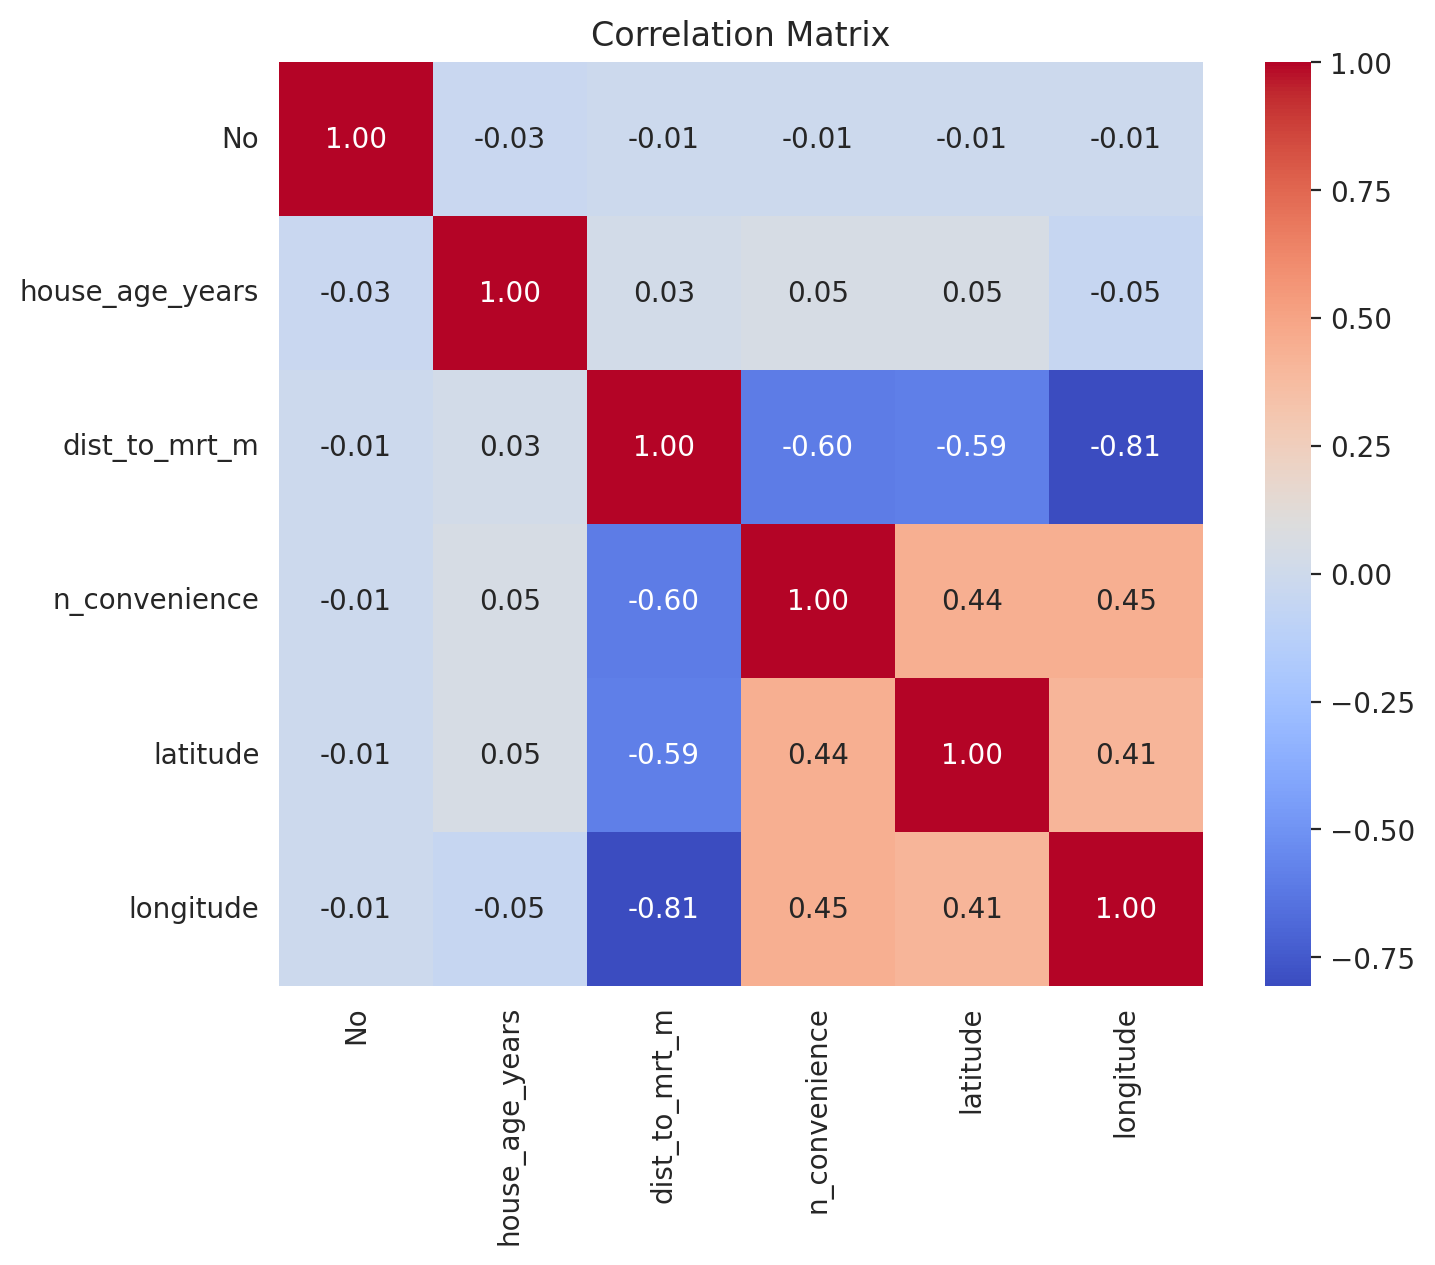

In [10]:
corr_matrix = df_estate.iloc[:, :6].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

Draw a scatter plot of n_convenience vs. price_twd_msq:

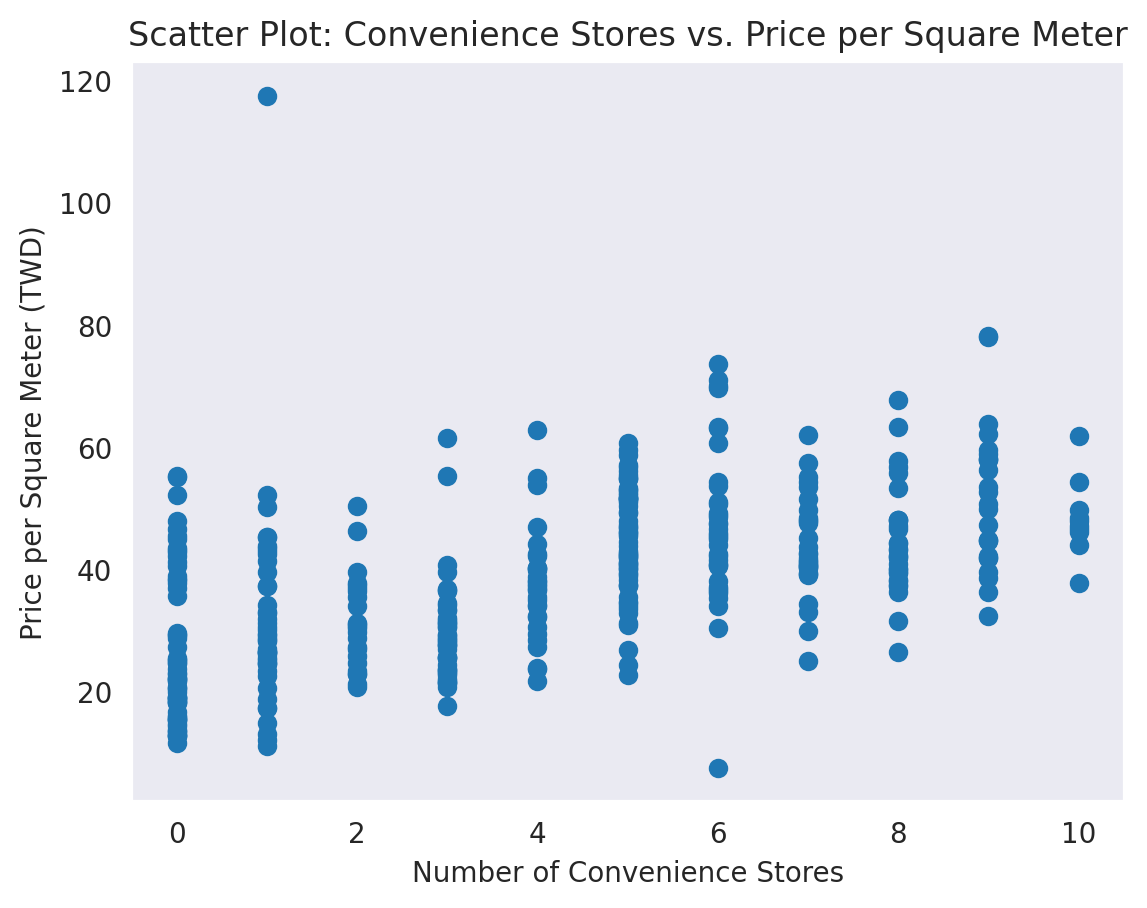

In [11]:
plt.scatter(df_estate['n_convenience'], df_estate['price_twd_msq'])
plt.xlabel('Number of Convenience Stores')
plt.ylabel('Price per Square Meter (TWD)')
plt.title('Scatter Plot: Convenience Stores vs. Price per Square Meter')
plt.grid()
plt.show()


Draw a scatter plot of house_age_years vs. price_twd_msq:

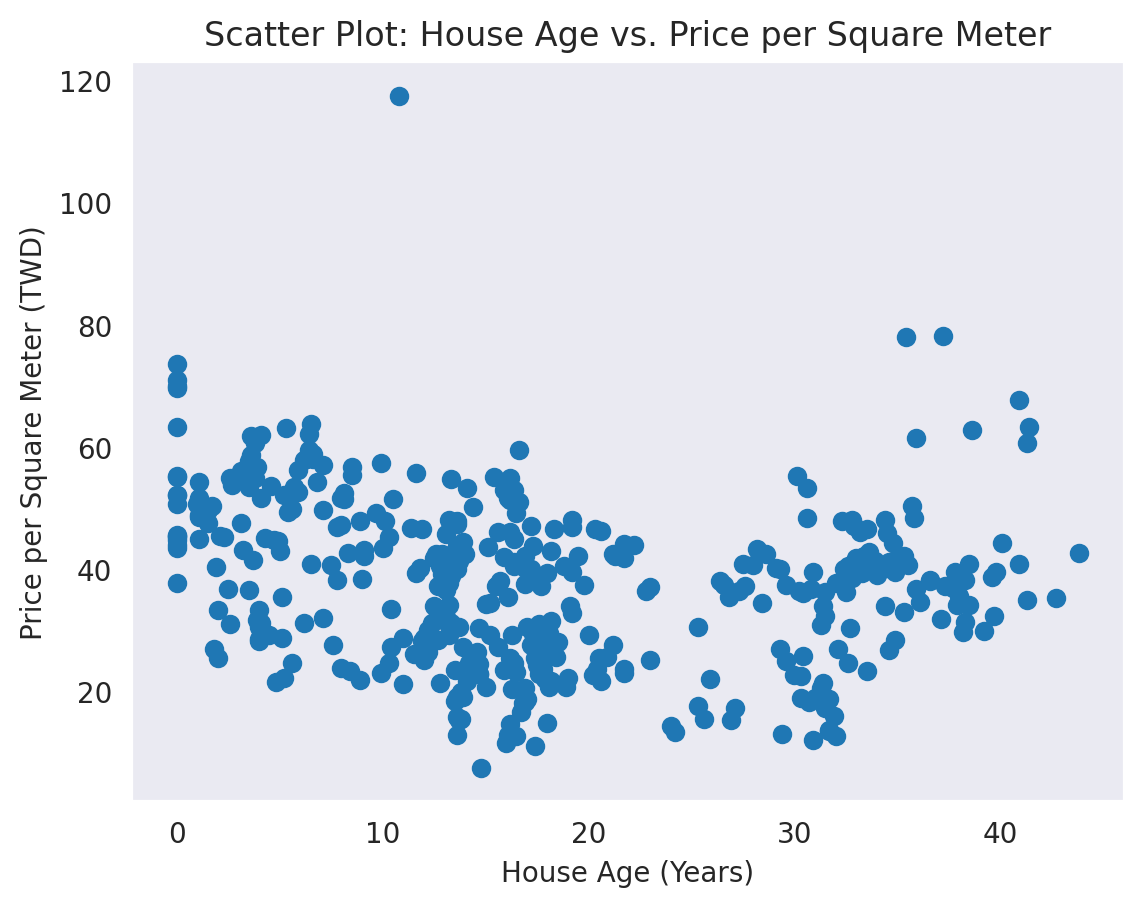

In [12]:
plt.scatter(df_estate['house_age_years'], df_estate['price_twd_msq'])
plt.xlabel('House Age (Years)')
plt.ylabel('Price per Square Meter (TWD)')
plt.title('Scatter Plot: House Age vs. Price per Square Meter')
plt.grid()
plt.show()

Draw a scatter plot of distance to nearest MRT station vs. price_twd_msq:

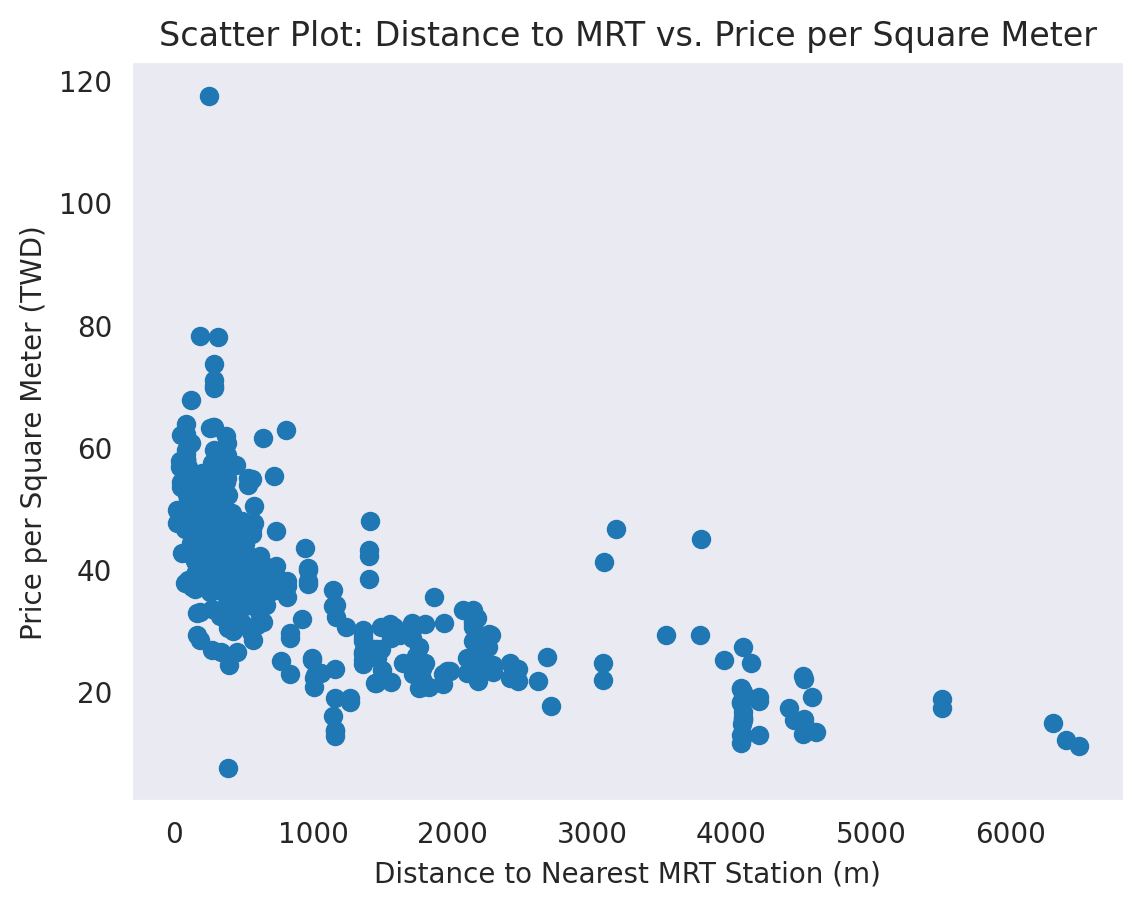

In [13]:
plt.scatter(df_estate['dist_to_mrt_m'], df_estate['price_twd_msq'])
plt.xlabel('Distance to Nearest MRT Station (m)')
plt.ylabel('Price per Square Meter (TWD)')
plt.title('Scatter Plot: Distance to MRT vs. Price per Square Meter')
plt.grid()
plt.show()

Plot a histogram of price_twd_msq with 10 bins, facet the plot so each house age group gets its own panel:

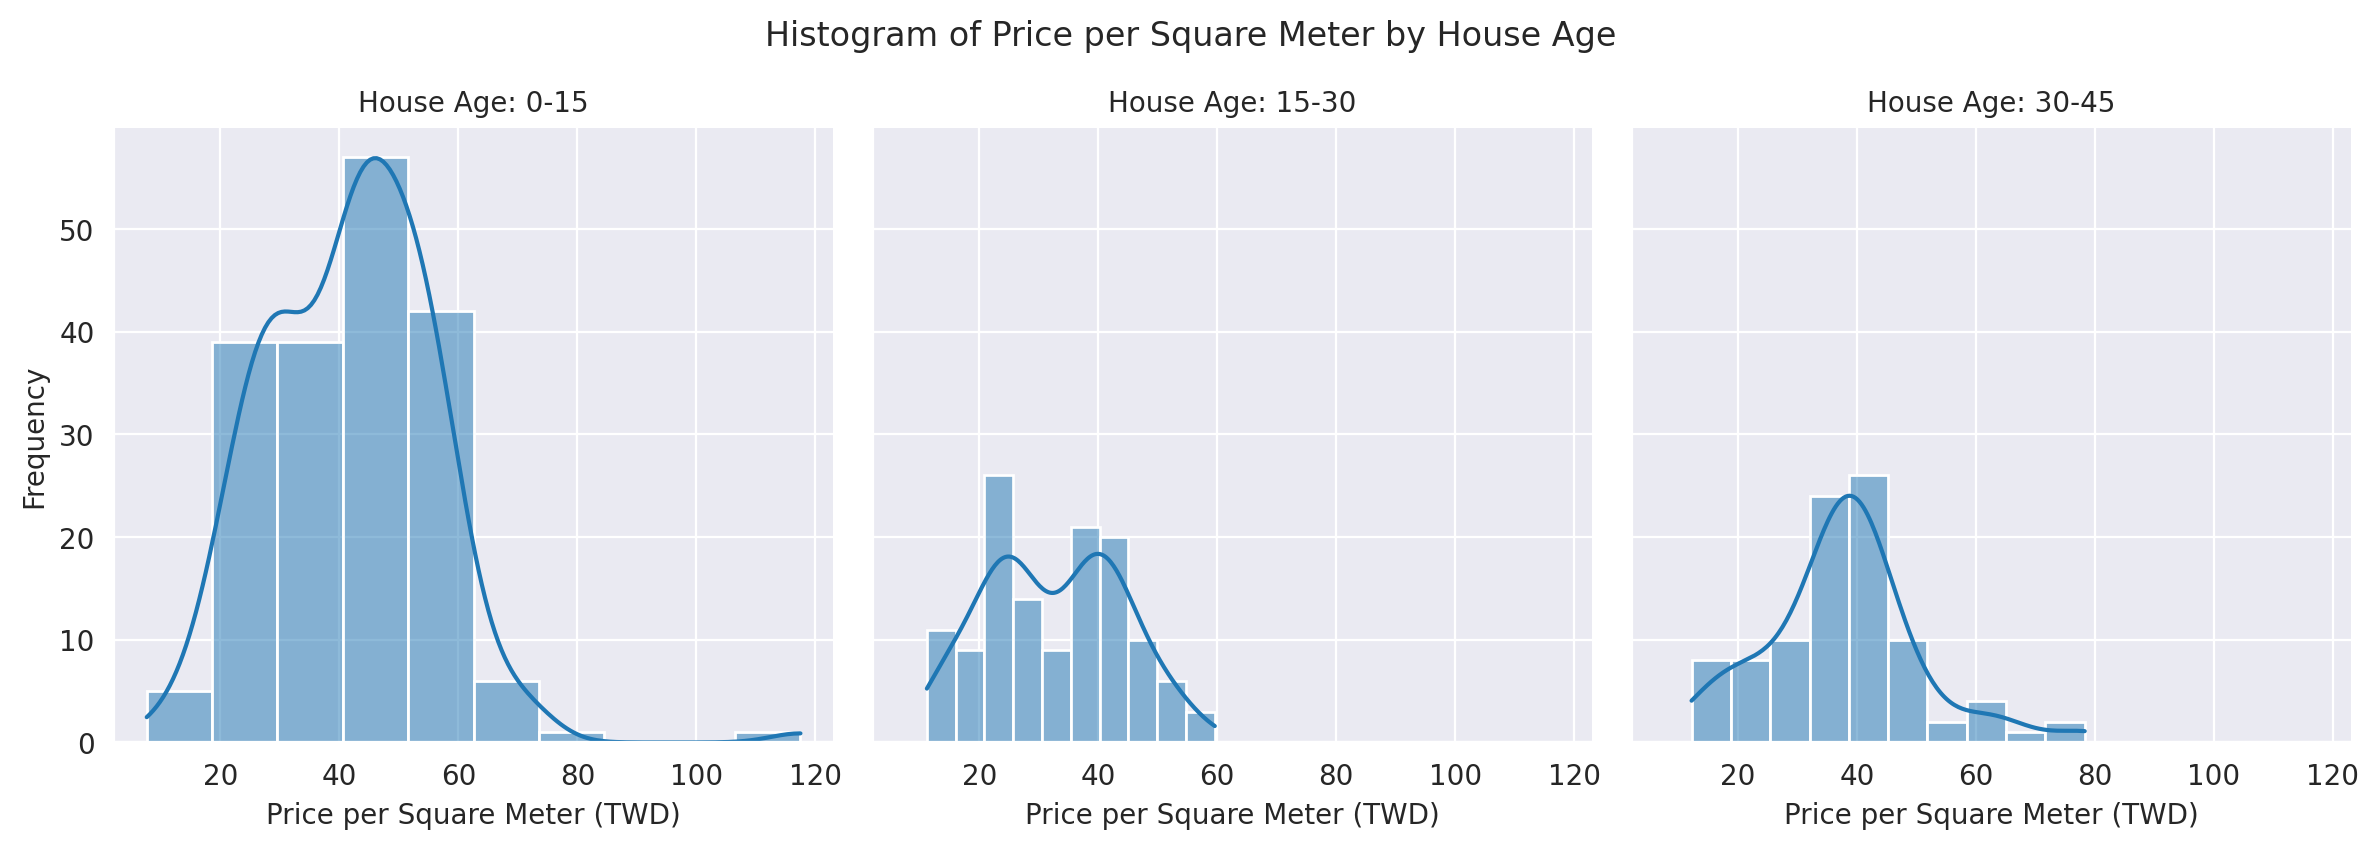

In [14]:
g = sns.FacetGrid(df_estate, col='house_age_cat_str', col_wrap=3, height=4)
g.map(sns.histplot, 'price_twd_msq', bins=10, kde=True)
g.set_axis_labels('Price per Square Meter (TWD)', 'Frequency')
g.set_titles(col_template='House Age: {col_name}')
g.fig.suptitle('Histogram of Price per Square Meter by House Age', y=1.05)
plt.show()

Summarize to calculate the mean, sd, median etc. house price/area by house age:

In [15]:
summary_stats = df_estate.groupby('house_age_cat_str')['price_twd_msq'].describe()
summary_stats = summary_stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
summary_stats.rename(columns={
    'mean': 'Mean Price per Square Meter (TWD)',
    'std': 'Standard Deviation',
    'min': 'Minimum',
    '25%': '25th Percentile',
    '50%': 'Median',
    '75%': '75th Percentile',
    'max': 'Maximum'
}, inplace=True)
summary_stats

/tmp/ipykernel_218511/475905389.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_estate.groupby('house_age_cat_str')['price_twd_msq'].describe()


,Mean Price per Square Meter (TWD),Standard Deviation,Minimum,25th Percentile,Median,75th Percentile,Maximum
house_age_cat_str,,,,,,,
0-15,41.766842,14.164308,7.6,30.725,42.55,51.675,117.5
15-30,32.642636,11.398217,11.2,23.700,32.90,41.200,59.6
30-45,37.654737,12.842547,12.2,31.200,38.30,42.250,78.3


## Simple model

Run a linear regression of price_twd_msq vs. best, but only 1 predictor:

In [16]:
import statsmodels.api as sm

# Let's use 'dist_to_mrt_m' as the single best predictor
X = df_estate[['dist_to_mrt_m']]
y = df_estate['price_twd_msq']

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model1 = sm.OLS(y, X).fit()

# Show the summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     342.2
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           4.64e-56
Time:                        22:21:45   Log-Likelihood:                -1542.5
No. Observations:                 414   AIC:                             3089.
Df Residuals:                     412   BIC:                             3097.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            45.8514      0.653     70.258

What do the above results mean? Write down the model and interpret it.

Discuss model accuracy.

The model is:
price_twd_msq = 45.85 - 0.087 * dist_to_mrt_m
This means for every meter farther from the MRT station, the price per square meter decreases by 0.087 units, which is statistically significant (p < 0.001).
Model Accuracy
    •    R-squared = 0.454: The model explains 45.4% of the variance in house prices — moderate but not high.
    •    RMSE about 8.38: The average prediction error is about 8.38 units, which is reasonable depending on the price scale.
    •    Conclusion: The model is statistically valid but not highly accurate — more features are likely needed for better predictions.


## Model diagnostics

### 4 Diagnostic plots

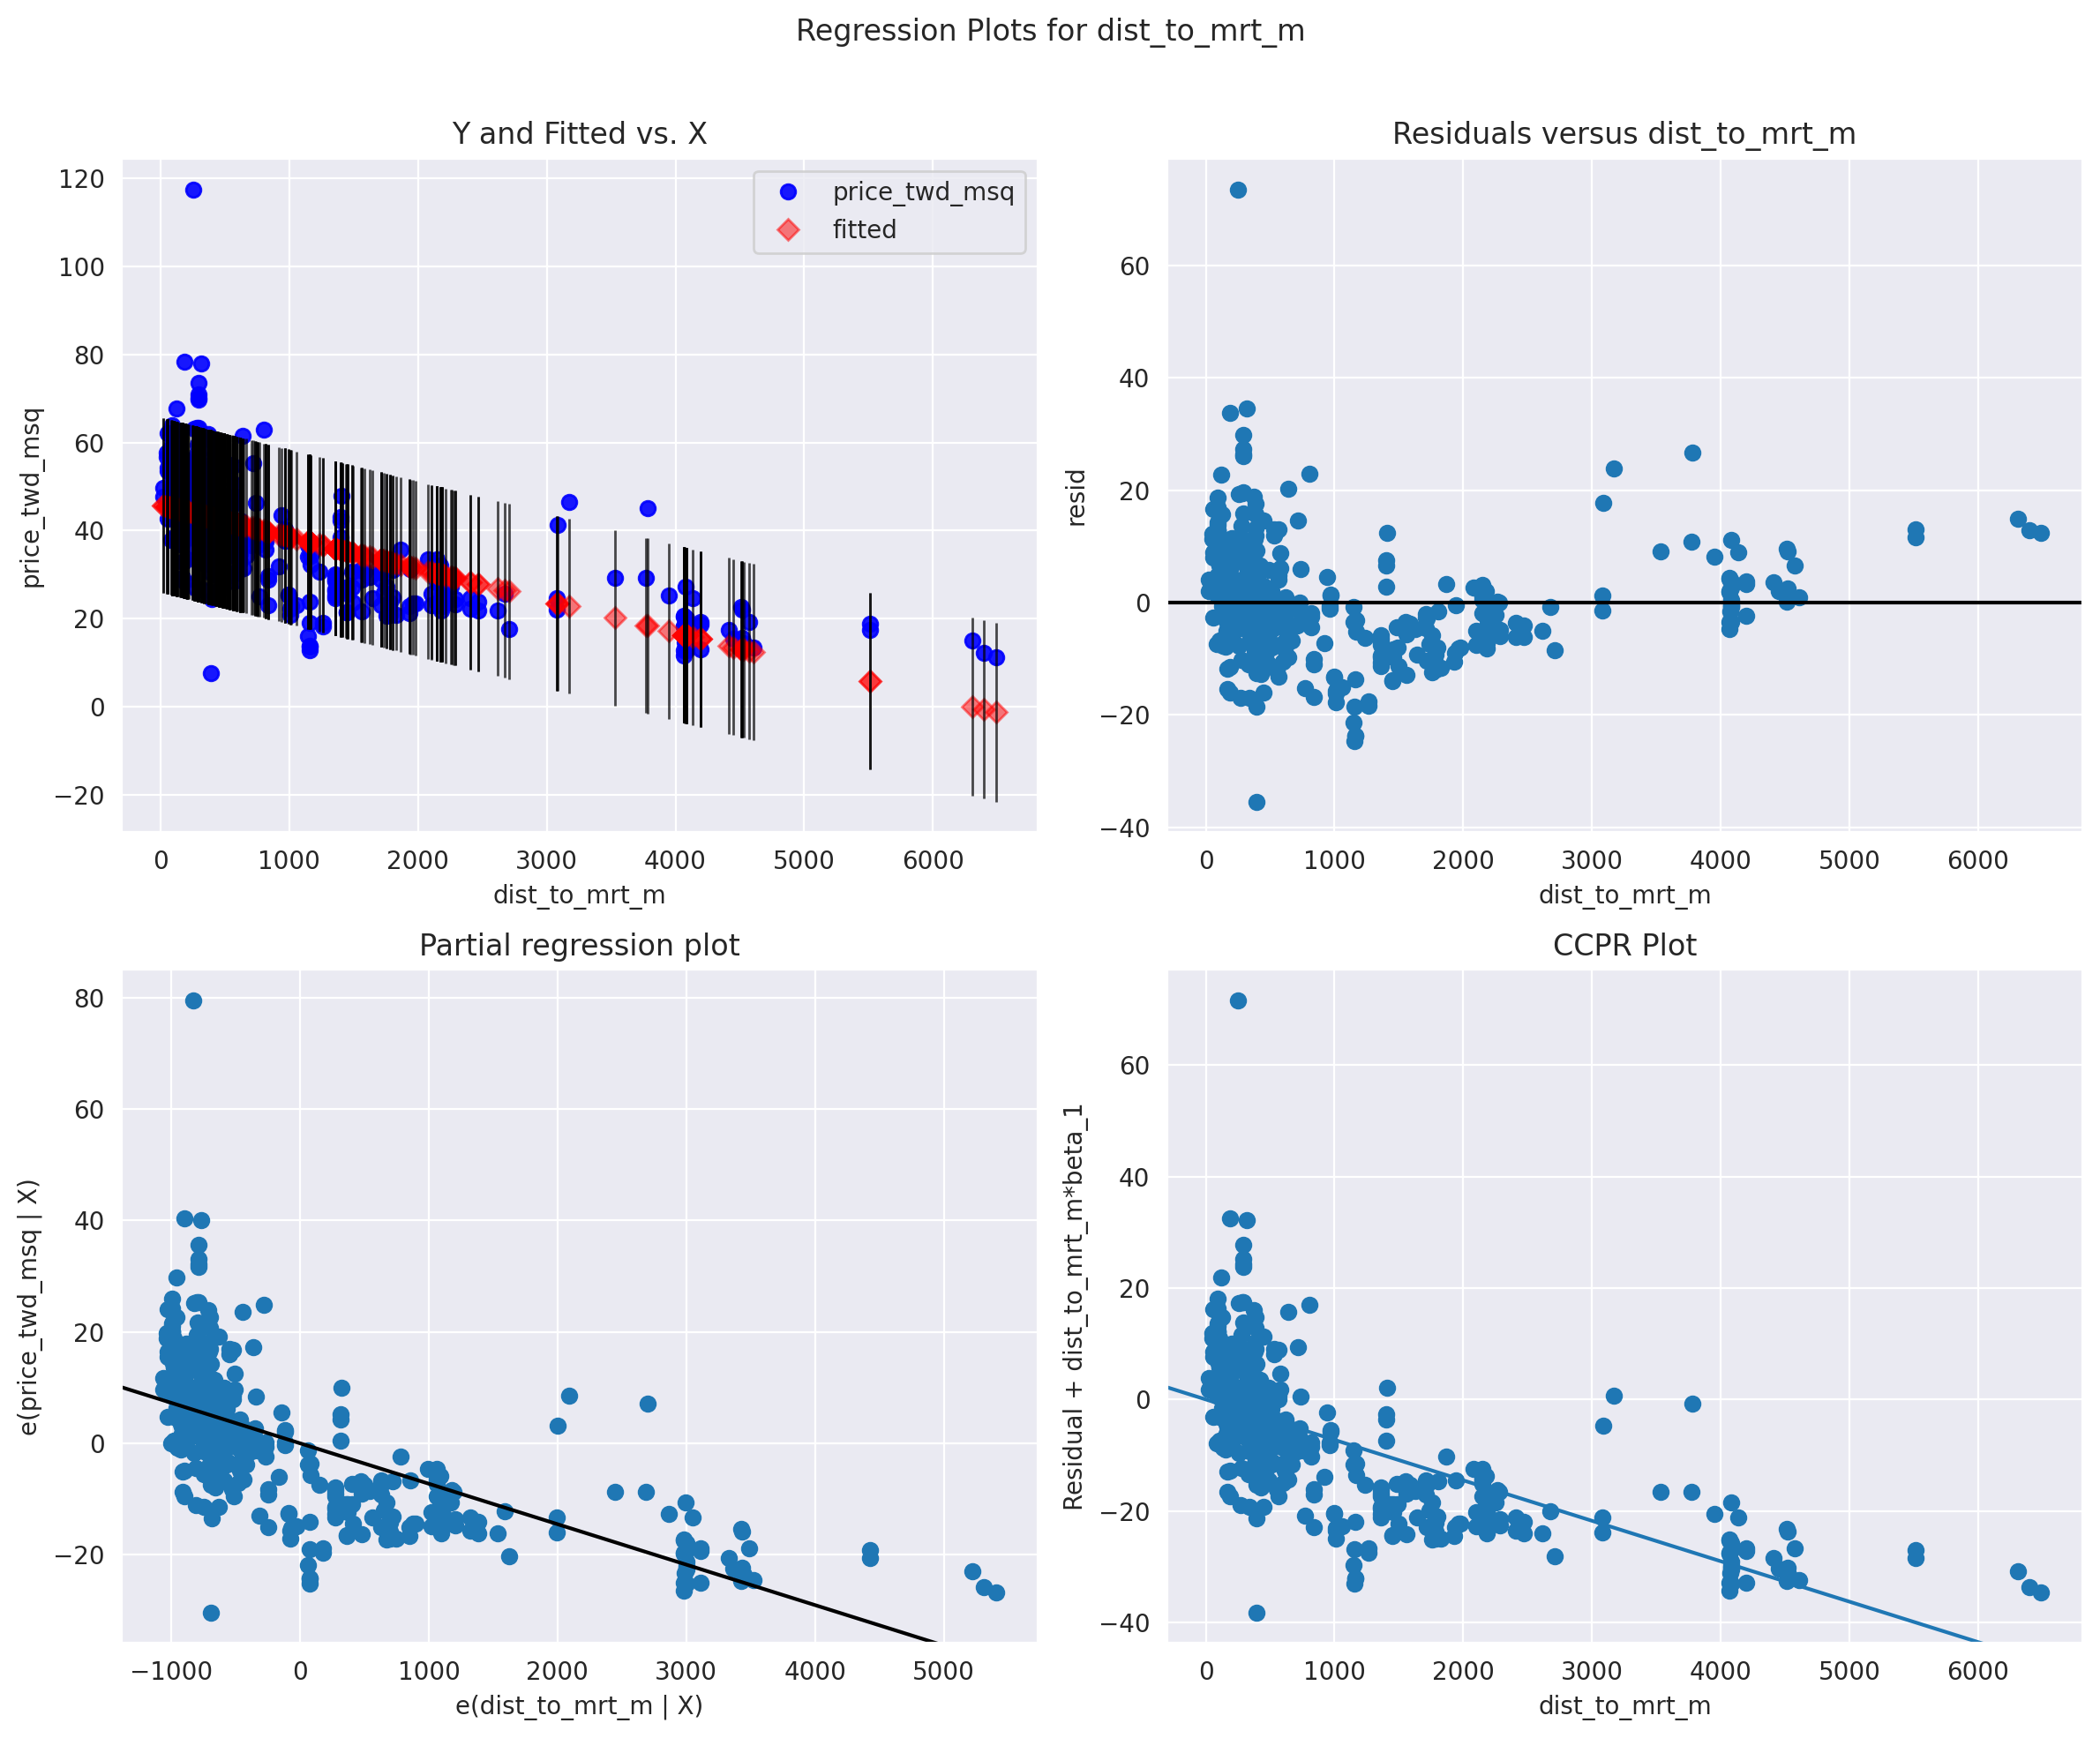

In [17]:
fig = plt.figure(figsize=(12, 10))
sm.graphics.plot_regress_exog(model1, 'dist_to_mrt_m', fig=fig)
plt.show()

The four plots show...
Top-Left (Y and Fitted vs. X):,
Shows predicted vs actual values – confirms a general downward trend but with some scatter, especially at short distances.

Top-Right (Residuals vs. X):,
Displays non-constant variance (heteroscedasticity), as residual spread is larger at lower distances.

Bottom-Left (Partial Regression Plot):,
Confirms a negative linear relationship between distance to MRT and house price after controlling for other variables.

Bottom-Right (CCPR Plot):,
Visualizes the component + residuals – further supports the negative relationship and highlights nonlinear effects.

These plots suggest the relationship is valid but potentially benefits from transformation or modeling nonlinearity.

### Outliers and high levarage points:

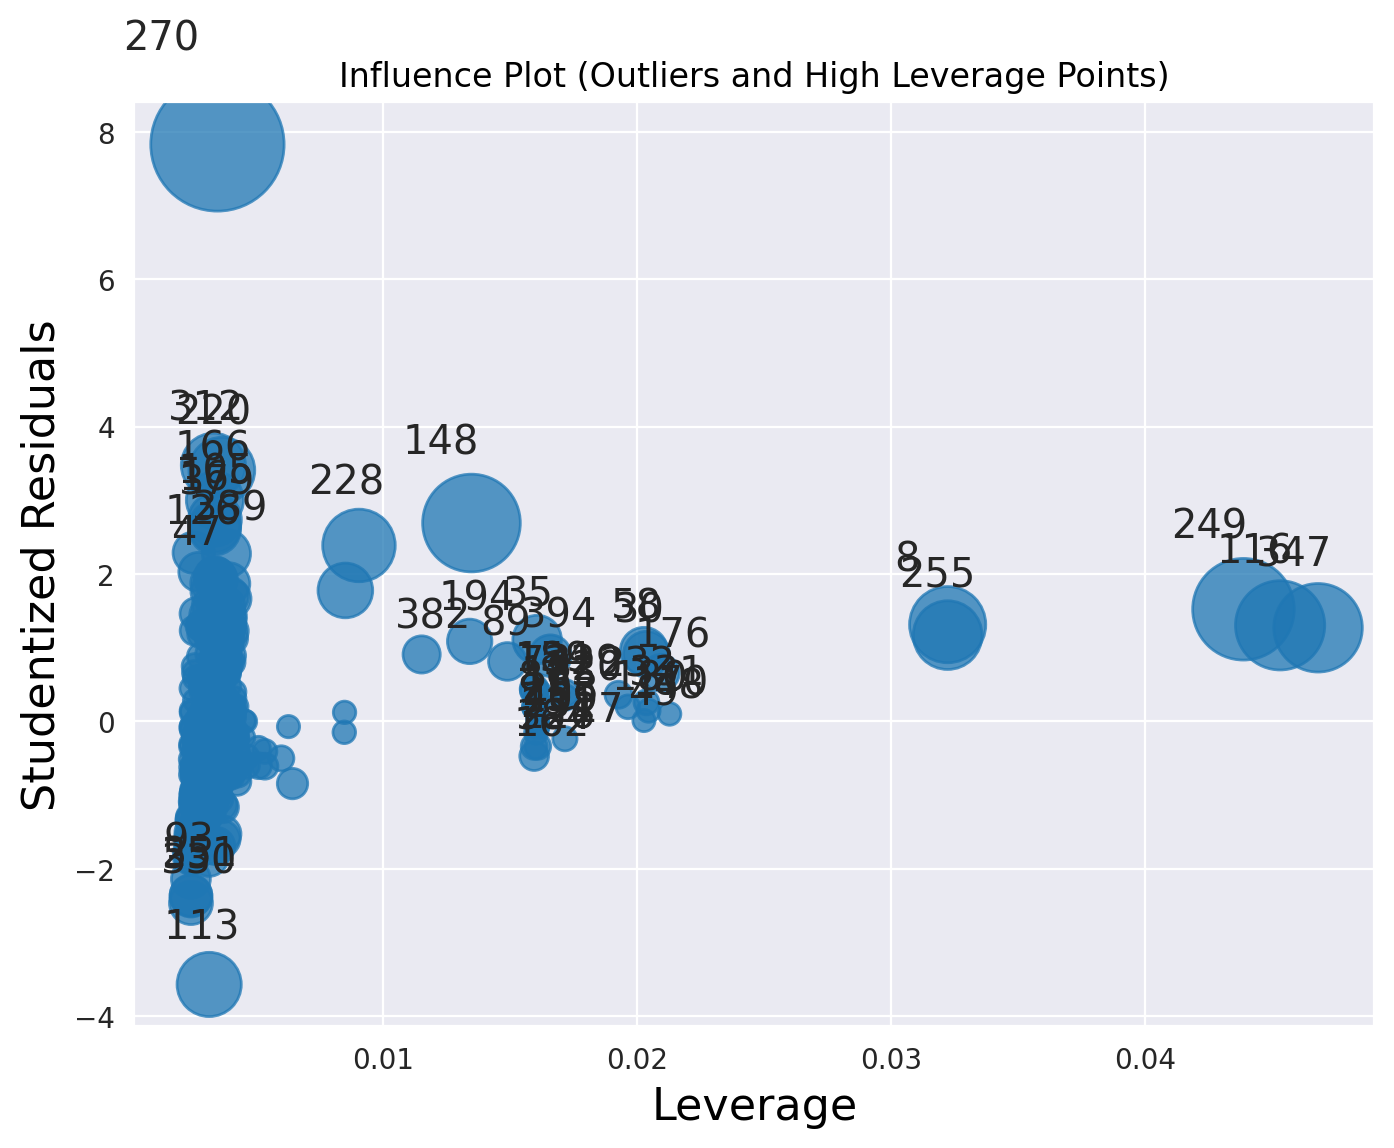

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.influence_plot(model1, ax=ax, criterion="cooks")
plt.title("Influence Plot (Outliers and High Leverage Points)")
plt.show()

Discussion:
The plot shows a few influential points (e.g. 270, 855, 249) with high leverage or large residuals, indicating they could distort the model and may need further investigation or removal.



## Multiple Regression Model

### Test and training set 

We begin by splitting the dataset into two parts, training set and testing set. In this example we will randomly take 75% row in this dataset and put it into the training set, and other 25% row in the testing set:

In [19]:
# One-hot encoding for house_age_cat_str in df_estate

encode_dict = {True: 1, False: 0}

house_age_0_15 = df_estate['house_age_cat_str'] == '0-15'
house_age_15_30 = df_estate['house_age_cat_str'] == '15-30'
house_age_30_45 = df_estate['house_age_cat_str'] == '30-45'

df_estate['house_age_0_15'] = house_age_0_15.map(encode_dict)
df_estate['house_age_15_30'] = house_age_15_30.map(encode_dict)
df_estate['house_age_30_45'] = house_age_30_45.map(encode_dict)

df_estate.head()

,No,house_age_years,dist_to_mrt_m,n_convenience,latitude,longitude,price_twd_msq,house_age_cat,house_age_cat_str,house_age_0_15,house_age_15_30,house_age_30_45
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,"[30, 45)",30-45,0,0,1
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,"[15, 30)",15-30,0,1,0
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,"[0, 15)",0-15,1,0,0
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,"[0, 15)",0-15,1,0,0
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,"[0, 15)",0-15,1,0,0


In [20]:
from sklearn.model_selection import train_test_split

# 75% training, 25% testing, random_state=12 for reproducibility
train, test = train_test_split(df_estate, train_size=0.75, random_state=12)

Now we have our training set and testing set. 

### Variable selection methods

Generally, selecting variables for linear regression is a debatable topic.

There are many methods for variable selecting, namely, forward stepwise selection, backward stepwise selection, etc, some are valid, some are heavily criticized.

I recommend this document: <https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/26/lecture-26.pdf> and Gung's comment: <https://stats.stackexchange.com/questions/20836/algorithms-for-automatic-model-selection/20856#20856> if you want to learn more about variable selection process.

[**If our goal is prediction**]{.ul}, it is safer to include all predictors in our model, removing variables without knowing the science behind it usually does more harm than good!!!

We begin to create our multiple linear regression model:

In [21]:
import statsmodels.formula.api as smf
model2 = smf.ols('price_twd_msq ~ dist_to_mrt_m + house_age_0_15 + house_age_30_45', data = df_estate)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     128.9
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           7.84e-59
Time:                        22:21:46   Log-Likelihood:                -1530.2
No. Observations:                 414   AIC:                             3068.
Df Residuals:                     410   BIC:                             3084.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          43.4096      1.052     41.275      0.000      41.342      45.477
dist_to_mrt_m      -0.0070      0.000    -17.889      0.000      -0.008      -0.006
house_age_0_15      4.8450      1.143      4.239      0.000       2.598       7.092
house_age_30_45    -0.1016      1.355     -0.075      0.940      -2.765       2.562
==============================================================================
Omnibus:                      145.540   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1077.318
Skew:                           1.296   Prob(JB):                    1.16e-234
Kurtosis:                      10.466   Cond. No.                     6.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What about distance to mrt? Please plot its scatterplot with the dependent variable and verify, if any transformation is needed:

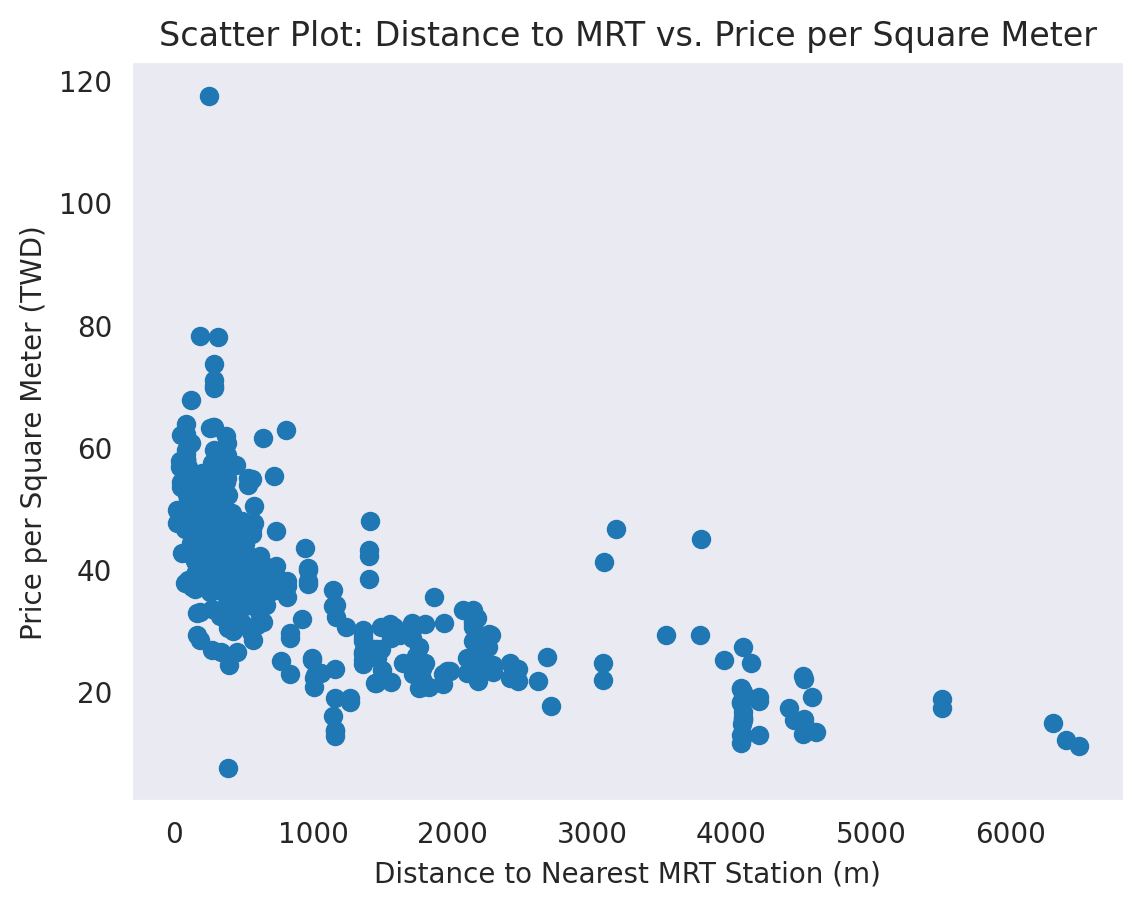

In [22]:
plt.scatter(df_estate['dist_to_mrt_m'], df_estate['price_twd_msq'])
plt.xlabel('Distance to Nearest MRT Station (m)')
plt.ylabel('Price per Square Meter (TWD)')
plt.title('Scatter Plot: Distance to MRT vs. Price per Square Meter')
plt.grid()
plt.show()

# it seems that the transformation is needed we need to log the price per square meter

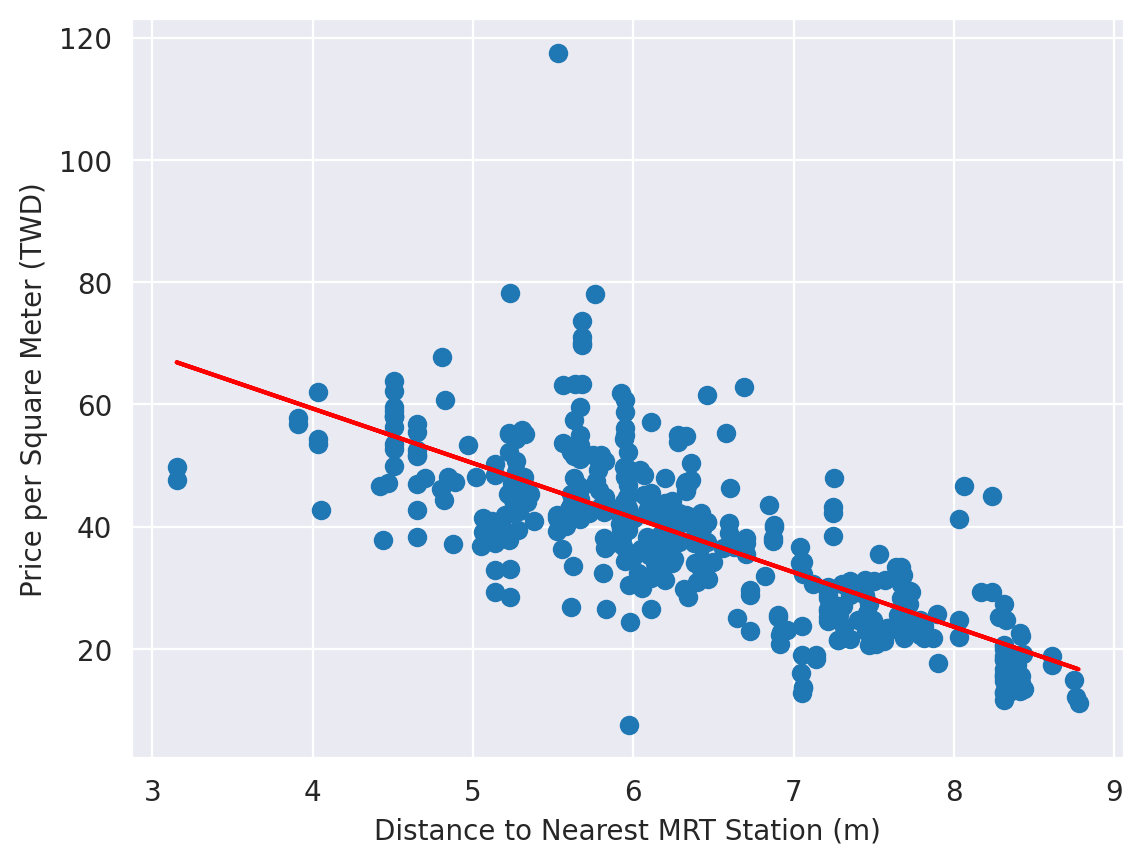

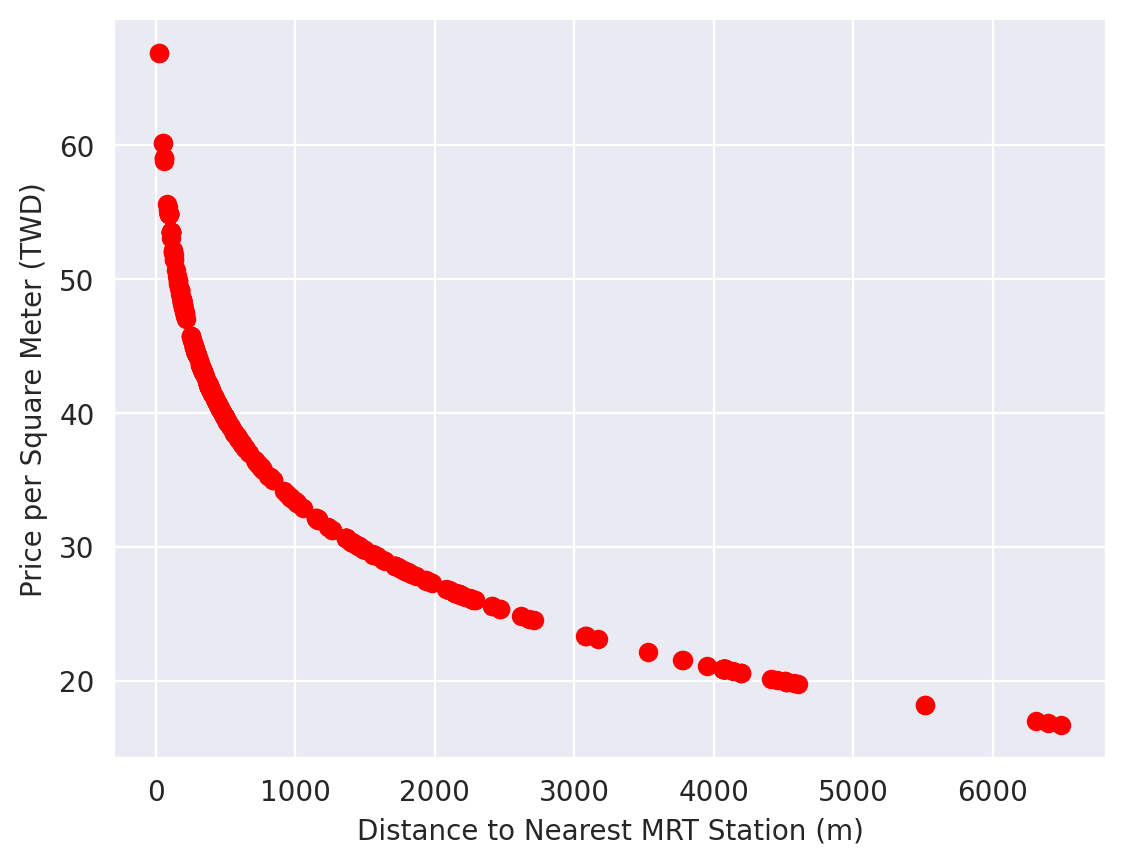

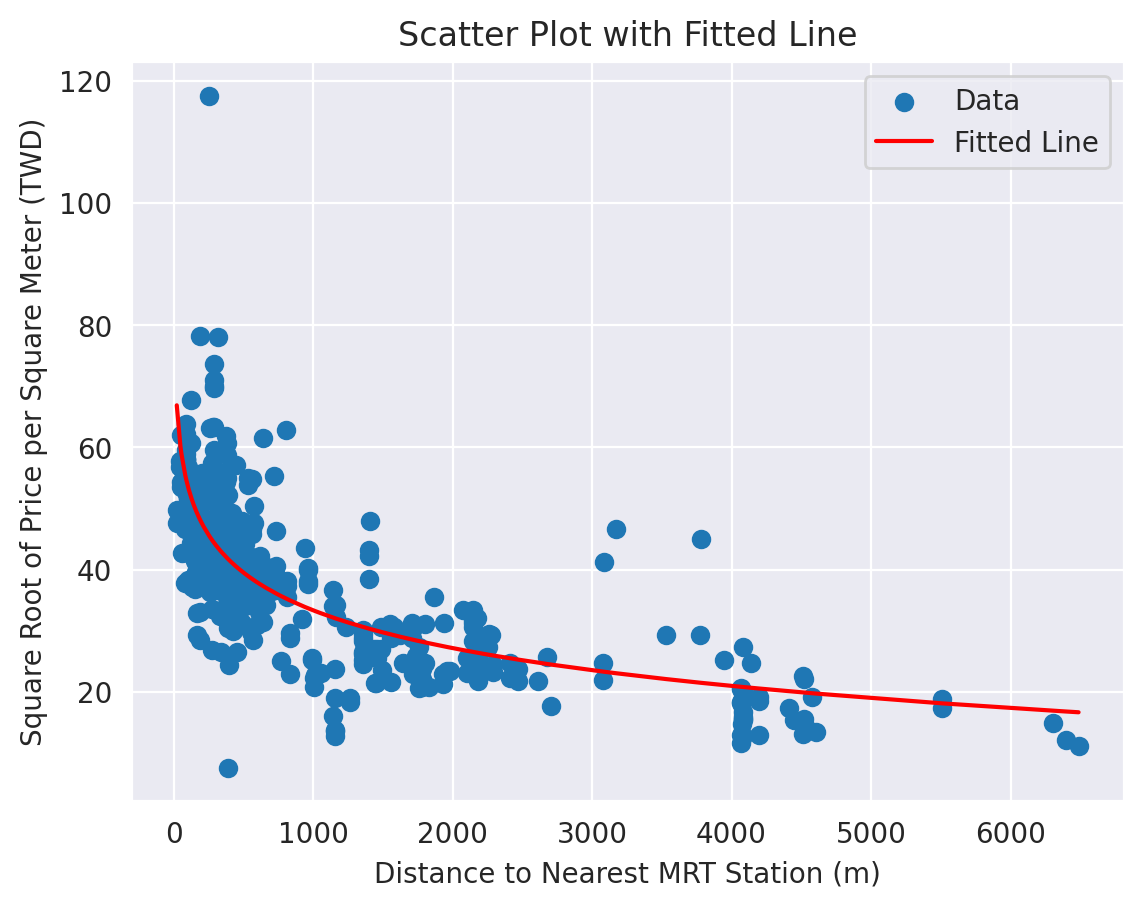

In [36]:
# If any transformation is necessary, please estimate the Model3 with the transformed distance to mrt.
x = np.log(df_estate['dist_to_mrt_m'])
y = df_estate['price_twd_msq']
model3 = smf.ols('y ~ x', data=df_estate)
result3 = model3.fit()
predict = result3.predict()

plt.scatter(x, y)
plt.plot(x, predict, color='red')
plt.xlabel('Distance to Nearest MRT Station (m)')
plt.ylabel('Price per Square Meter (TWD)')
plt.show()

plt.scatter(df_estate['dist_to_mrt_m'], predict, color='red')
plt.xlabel('Distance to Nearest MRT Station (m)')
plt.ylabel('Price per Square Meter (TWD)')
plt.show()

sorted_idx = np.argsort(x)

plt.scatter(df_estate['dist_to_mrt_m'], df_estate['price_twd_msq'], label='Data')
plt.plot(df_estate['dist_to_mrt_m'][sorted_idx], predict[sorted_idx], color='red', label='Fitted Line')
plt.xlabel('Distance to Nearest MRT Station (m)')
plt.ylabel('Square Root of Price per Square Meter (TWD)')

plt.title('Scatter Plot with Fitted Line')
plt.legend()
plt.show()


Discuss the results...
As the distance increases, the price tends to decrease, but at a diminishing rate — which is well captured by applying a log transformation to the predictor. The fitted line closely follows the trend of the data, especially at shorter distances, suggesting the transformed model better represents the underlying relationship than a simple linear one.



In [24]:
#Calculating residual standard error of Model1
mse_result1 = model1.mse_resid
rse_result1 = np.sqrt(mse_result1)
print('The residual standard error for the above model is:',np.round(mse_result1,3))

The residual standard error for the above model is: 101.375


In [25]:
#Calculating residual standard error of Model2
mse_result2 = result2.mse_resid
rse_result2 = np.sqrt(mse_result2)
print('The residual standard error for the above model is:',np.round(rse_result2,3))

The residual standard error for the above model is: 9.796


Looking at model summary, we see that variables .... are insignificant, so let's estimate the model without those variables:

In [26]:
model2 = smf.ols('price_twd_msq ~ dist_to_mrt_m + house_age_0_15', data = df_estate)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     193.9
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           4.99e-60
Time:                        22:21:47   Log-Likelihood:                -1530.2
No. Observations:                 414   AIC:                             3066.
Df Residuals:                     411   BIC:                             3078.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         43.3589      0.805     53.882      0.000      41.777      44.941
dist_to_mrt_m     -0.0070      0.000    -18.307      0.000      -0.008      -0.006
house_age_0_15     4.8900      0.972      5.032      0.000       2.980       6.800
==============================================================================
Omnibus:                      145.283   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1075.524
Skew:                           1.293   Prob(JB):                    2.84e-234
Kurtosis:                      10.461   Cond. No.                     3.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Evaluating multi-collinearity

There are many standards researchers apply for deciding whether a VIF is too large. In some domains, a VIF over 2 is worthy of suspicion. Others set the bar higher, at 5 or 10. Others still will say you shouldn't pay attention to these at all. Ultimately, the main thing to consider is that small effects are more likely to be "drowned out" by higher VIFs, but this may just be a natural, unavoidable fact with your model.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_vif = df_estate[['dist_to_mrt_m', 'house_age_0_15', 'house_age_30_45']].copy()
X_vif = X_vif.fillna(0)  # Fill missing values if any

# Add constant (intercept)
X_vif = sm.add_constant(X_vif)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

           feature       VIF
0            const  4.772153
1    dist_to_mrt_m  1.061497
2   house_age_0_15  1.399276
3  house_age_30_45  1.400308


Discuss the results...



Finally we test our best model on test dataset (change, if any transformation on dist_to_mrt_m was needed):

In [28]:
# Prepare test predictors (must match training predictors)
X_test = test[['dist_to_mrt_m', 'house_age_0_15', 'house_age_30_45']].copy()
X_test = X_test.fillna(0)
X_test = sm.add_constant(X_test)

# True values
y_test = test['price_twd_msq']

# Predict using model2
y_pred = result2.predict(X_test)

# Calculate RMSE as an example metric
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.2f}")

Test RMSE: 8.38


Interpret results...
The test RMSE of 8.38 indicates that the model’s predictions deviate from the actual prices by about 8.38 units on average, which is reasonably good if the target values are on a larger scale.


## Variable selection using best subset regression

*Best subset and stepwise (forward, backward, both) techniques of variable selection can be used to come up with the best linear regression model for the dependent variable medv.*

In [29]:
# Best subset selection using sklearn's SequentialFeatureSelector (forward and backward)
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Prepare predictors and target
X = df_estate[['dist_to_mrt_m', 'n_convenience', 'house_age_0_15', 'house_age_15_30', 'house_age_30_45']]
y = df_estate['price_twd_msq']

# Initialize linear regression model
lr = LinearRegression()

# Forward stepwise selection
sfs_forward = SequentialFeatureSelector(lr, n_features_to_select='auto', direction='forward', cv=5)
sfs_forward.fit(X, y)
print("Forward selection support:", sfs_forward.get_support())
print("Selected features (forward):", X.columns[sfs_forward.get_support()].tolist())

# Backward stepwise selection
sfs_backward = SequentialFeatureSelector(lr, n_features_to_select='auto', direction='backward', cv=5)
sfs_backward.fit(X, y)
print("Backward selection support:", sfs_backward.get_support())
print("Selected features (backward):", X.columns[sfs_backward.get_support()].tolist())

Forward selection support: [ True  True False False False]
Selected features (forward): ['dist_to_mrt_m', 'n_convenience']
Backward selection support: [ True  True False False  True]
Selected features (backward): ['dist_to_mrt_m', 'n_convenience', 'house_age_30_45']


### Comparing competing models

In [30]:
import statsmodels.api as sm

# Example: Compare AIC for models selected by forward and backward stepwise selection

# Forward selection model
features_forward = X.columns[sfs_forward.get_support()].tolist()
X_forward = df_estate[features_forward]
X_forward = sm.add_constant(X_forward)
model_forward = sm.OLS(y, X_forward).fit()
print("AIC (forward selection):", model_forward.aic)

# Backward selection model
features_backward = X.columns[sfs_backward.get_support()].tolist()
X_backward = df_estate[features_backward]
X_backward = sm.add_constant(X_backward)
model_backward = sm.OLS(y, X_backward).fit()
print("AIC (backward selection):", model_backward.aic)

# You can print summary for the best model (e.g., forward)
print(model_forward.summary())

AIC (forward selection): 3057.2813425866216
AIC (backward selection): 3047.991777087278
                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     202.7
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           5.61e-62
Time:                        22:21:47   Log-Likelihood:                -1525.6
No. Observations:                 414   AIC:                             3057.
Df Residuals:                     411   BIC:                             3069.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

From Best subset regression and stepwise selection (forward, backward, both), we see that the models selected by forward and backward selection may include different sets of predictors, depending on their contribution to model fit. 

By comparing AIC values, the model with the lowest AIC is preferred, as it balances model complexity and goodness of fit.

In this case, the summary output for the best model (e.g., forward selection) shows which variables are most important for predicting price_twd_msq. This approach helps identify the most relevant predictors and avoid overfitting by excluding unnecessary variables.

Run model diagnostics for the BEST model:

In [34]:
model_backward.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     142.3
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           3.42e-63
Time:                        22:31:40   Log-Likelihood:                -1520.0
No. Observations:                 414   AIC:                             3048.
Df Residuals:                     410   BIC:                             3064.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              39.7933      1.299     30.638      0.000      37.240      42.346
dist_to_mrt_m      -0.0056      0.000    -12.069      0.000      -0.007      -0.005
n_convenience       1.2636      0.201      6.286      0.000       0.868       1.659
house_age_30_45    -3.8074      1.131     -3.367      0.001      -6.030      -1.584
==============================================================================
Omnibus:                      203.688   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2388.586
Skew:                           1.793   Prob(JB):                         0.00
Kurtosis:                      14.208   Cond. No.                     4.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Finally, we can check the Out-of-sample Prediction or test error (MSPE):

In [32]:
X_test = test[features_forward].copy()
X_test = X_test.fillna(0)
X_test = sm.add_constant(X_test)

# True values
y_test = test['price_twd_msq']

# Predict using the best model (e.g., forward selection)
y_pred = model_forward.predict(X_test)

# Calculate MSPE (Mean Squared Prediction Error)
mspe = np.mean((y_test - y_pred) ** 2)
print(f"Test MSPE (out-of-sample): {mspe:.2f}")

Test MSPE (out-of-sample): 64.80


## Cross Validation

In Python, for cross-validation of regression models is usually done with cross_val_score from sklearn.model_selection.

To get the raw cross-validation estimate of prediction error (e.g., mean squared error), use:

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

X = df_estate[['dist_to_mrt_m', 'house_age_0_15', 'house_age_30_45']]
y = df_estate['price_twd_msq']

model = LinearRegression()

# 5-fold cross-validation, scoring negative MSE (so we multiply by -1 to get positive MSE)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Raw cross-validation estimate of prediction error (mean MSE)
cv_mse = -cv_scores.mean()
cv_rmse = np.sqrt(cv_mse)

print(f"Cross-validated MSE: {cv_mse:.2f}")
print(f"Cross-validated RMSE: {cv_rmse:.2f}")

Cross-validated MSE: 95.90
Cross-validated RMSE: 9.79


Do you understand all numerical measures printed in the SUMMARY of the regression report?,
Yes.

Why do we need a cross-validation?,
To check how well the model generalizes to unseen data and avoid overfitting.

What are the diagnostic plots telling us?,
They show some heteroscedasticity and nonlinearity, but the model captures the overall trend; some assumptions are slightly violated.

How to compare similar, but competing models?,
By comparing AIC scores – the lower, the better.

What is VIF telling us?,
Variance Inflation Factor (VIF) measures multicollinearity between predictors; high VIF indicates redundancy and potential instability in the model.

How to choose best set of predictors for the model?,
Use stepwise selection, AIC/BIC comparison, or regularization techniques like Lasso or Ridge to balance simplicity and performance.
